In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import os
from collections import Counter

## Read in Data

In [28]:
os.listdir('pyktok_data')

['Sec2Gr3_77777.csv',
 'Sec2Gr3_77217.csv',
 'Sec1Gr1_10824.csv',
 'Sec2Gr3_74721.csv',
 'Sec1Gr1_50405.csv',
 'Sec1Gr1_12345.csv',
 'Sec1Gr2_26301.csv',
 'Sec1Gr2_38129.csv',
 'Sec1Gr2_33534.csv']

In [29]:
filenames = """['Sec2Gr3_77777.csv',
 'Sec2Gr3_77217.csv',
 'Sec1Gr1_10824.csv',
 'Sec2Gr3_74721.csv',
 'Sec1Gr1_50405.csv',
 'Sec1Gr1_12345.csv',
 'Sec1Gr2_26301.csv',
 'Sec1Gr2_38129.csv',
 'Sec1Gr2_33534.csv']"""

pattern = re.compile('\d\d\d\d\d')
codes = pattern.findall(filenames)
for code in codes: print(f"'{code}',")

'77777',
'77217',
'10824',
'74721',
'50405',
'12345',
'26301',
'38129',
'33534',


In [30]:
codes = ['77777','77217','10824','74721','50405','12345','26301','38129','33534']

In [34]:
df77777 = pd.read_csv('pyktok_data/Sec2Gr3_77777.csv')
df77217 = pd.read_csv('pyktok_data/Sec2Gr3_77217.csv')
df10824 = pd.read_csv('pyktok_data/Sec1Gr1_10824.csv')
df74721 = pd.read_csv('pyktok_data/Sec2Gr3_74721.csv')
df50405 = pd.read_csv('pyktok_data/Sec1Gr1_50405.csv')
df12345 = pd.read_csv('pyktok_data/Sec1Gr1_12345.csv')
df26301 = pd.read_csv('pyktok_data/Sec1Gr2_26301.csv')
df38129 = pd.read_csv('pyktok_data/Sec1Gr2_38129.csv')
df33534 = pd.read_csv('pyktok_data/Sec1Gr2_33534.csv')

In [35]:
dfs = [df77777,df77217,df10824,df74721,df50405,df12345,df26301,df38129,df33534]

In [36]:
for code, df in zip(codes, dfs):
    print(f"User {code}, {len(df)}  videos")

User 77777, 482  videos
User 77217, 15424  videos
User 10824, 10999  videos
User 74721, 9009  videos
User 50405, 24288  videos
User 12345, 19102  videos
User 26301, 8068  videos
User 38129, 31  videos
User 33534, 7663  videos


In [37]:
# add a 'user' column to each df
for code, df in zip(codes, dfs): 
    df['user'] = code

all_dfs = pd.concat(dfs)
all_dfs.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,user,Unnamed: 0
0,7273221955937914155,2023-08-30T16:56:01,37.0,US,"angels in tibet, angels in tibet dance, angels...",356300.0,5606.0,986.0,2000000.0,Replying to @jade🐉not perfect yet & i made a ...,...,thebeaulexx,beaulexx,NaN,NaN,NaN,NaN,NaN,False,77777,NaN
1,7273221955937914155,2023-08-30T16:56:01,37.0,US,"angels in tibet, angels in tibet dance, angels...",356300.0,5606.0,986.0,2000000.0,Replying to @jade🐉not perfect yet & i made a ...,...,thebeaulexx,beaulexx,NaN,NaN,NaN,NaN,NaN,False,77777,NaN
2,7283080657893379334,2023-09-26T06:32:40,15.0,PH,"angels in tibet, Jam Republic, angels in tibet...",419100.0,3518.0,708.0,2600000.0,🧠🧠🧠,...,clarkie_cpm,Clarkie,NaN,NaN,NaN,NaN,NaN,False,77777,NaN
3,7273221955937914155,2023-08-30T16:56:01,37.0,US,"angels in tibet, angels in tibet dance, angels...",356300.0,5606.0,986.0,2000000.0,Replying to @jade🐉not perfect yet & i made a ...,...,thebeaulexx,beaulexx,NaN,NaN,NaN,NaN,NaN,False,77777,NaN
4,7285397643725983008,2023-10-02T12:23:48,37.0,US,"Dream Academy, angels in tibet, Adela Dream Ac...",142700.0,1373.0,551.0,1000000.0,s/o to dream academy for teaching me how to da...,...,adelajergova,ADÉLA,NaN,NaN,NaN,NaN,NaN,False,77777,NaN


In [38]:
ads77777 = df77777[df77777['video_is_ad']==True]
ads77217 = df77217[df77217['video_is_ad']==True]
ads10824 = df10824[df10824['video_is_ad']==True]
ads74721 = df74721[df74721['video_is_ad']==True]
ads50405 = df50405[df50405['video_is_ad']==True]
ads12345 = df12345[df12345['video_is_ad']==True]
ads26301 = df26301[df26301['video_is_ad']==True]
ads38129 = df38129[df38129['video_is_ad']==True]
ads33534 = df33534[df33534['video_is_ad']==True]

In [39]:
ads = [ads77777,ads77217,ads10824,ads74721,ads50405,ads12345,ads26301,ads38129,ads33534]

In [40]:
all_ads = pd.concat(ads)
# Alternatively
# all_ads = all_dfs[all_dfs['video_is_ad']==True]

In [41]:
all_ads

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,user,Unnamed: 0
20,7292119548742946049,2023-10-20T15:08:12,16.0,NaN,NaN,1604.0,52.0,0.0,13500000.0,Grab Limited Edition Starfield Rockstar Energy...,...,Rockstar Energy,Rockstar Energy,NaN,NaN,NaN,NaN,NaN,False,77777,NaN
24,7302509037529140522,2023-11-17T14:05:05,9.0,US,NaN,97900.0,678.0,189.0,3500000.0,Exploring the best of Budapest #rcmemories,...,theritzcarlton,The Ritz-Carlton,NaN,NaN,NaN,NaN,NaN,True,77777,NaN
28,7303574272830639362,2023-11-20T10:58:22,17.0,NaN,NaN,698.0,5.0,8.0,4200000.0,"Burt's Bees Cleansing Oil, gently removes dirt...",...,Burt's Bees,Burt's Bees,NaN,NaN,NaN,NaN,NaN,False,77777,NaN
33,7304361579066445102,2023-11-22T13:53:46,24.0,US,NaN,21200.0,609.0,0.0,22600000.0,if you’re in the market for this @Nespresso ma...,...,clararpeirce,Clara Peirce,NaN,NaN,NaN,NaN,NaN,False,77777,NaN
42,7293334568122240258,2023-10-23T21:43:05,13.0,NaN,NaN,1166.0,19.0,0.0,5600000.0,"Every cat deserves a fancy meal, so we’re dona...",...,Fancy Feast,Fancy Feast,NaN,NaN,NaN,NaN,NaN,False,77777,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7633,7319577304152296750,2024-01-02T13:58:42,27.0,US,NaN,16900.0,143.0,305.0,49800000.0,#cleanandclearpartner we love fresh and energi...,...,teatinz,Tivona,NaN,NaN,NaN,NaN,NaN,False,33534,NaN
7640,7314770555217906946,2023-12-20T15:05:40,6.0,FAKE-AD,NaN,6282.0,43.0,0.0,17500000.0,Keurig® has you covered for whatever cup you l...,...,Keurig,Keurig,NaN,NaN,NaN,NaN,NaN,False,33534,NaN
7646,7318767572969590058,2023-12-31T09:36:36,26.0,US,NaN,79400.0,445.0,584.0,18300000.0,There’s no better way to start 2024 🎇🏈 #cfb #c...,...,espn,ESPN,NaN,NaN,NaN,NaN,NaN,True,33534,NaN
7652,7262027736665836846,2023-07-31T12:56:44,38.0,US,"jon seaton highlights, jon seaton, Day In Life...",710700.0,2654.0,2120.0,136400000.0,#ad My day. Made adventurous by naked juice sm...,...,jonseaton,Jon Seaton,NaN,NaN,NaN,NaN,NaN,False,33534,NaN


In [42]:
for code, df, adDf in zip(codes, dfs, ads):
    print(f'{code}')
    print(f'Total number of videos: {df.shape[0]}')
    print(f'Number of ads: {adDf.shape[0]}')
    print(f'Percentage of all videos in browsing history: {round(adDf.shape[0]/df.shape[0],3)}')
    print()

77777
Total number of videos: 482
Number of ads: 85
Percentage of all videos in browsing history: 0.176

77217
Total number of videos: 15424
Number of ads: 2000
Percentage of all videos in browsing history: 0.13

10824
Total number of videos: 10999
Number of ads: 272
Percentage of all videos in browsing history: 0.025

74721
Total number of videos: 9009
Number of ads: 1451
Percentage of all videos in browsing history: 0.161

50405
Total number of videos: 24288
Number of ads: 3546
Percentage of all videos in browsing history: 0.146

12345
Total number of videos: 19102
Number of ads: 1776
Percentage of all videos in browsing history: 0.093

26301
Total number of videos: 8068
Number of ads: 1079
Percentage of all videos in browsing history: 0.134

38129
Total number of videos: 31
Number of ads: 2
Percentage of all videos in browsing history: 0.065

33534
Total number of videos: 7663
Number of ads: 1255
Percentage of all videos in browsing history: 0.164



### Find all the advertisers

In [43]:
for code, adDf in zip(codes, ads):
    print(f'{code}')
    print(f"Number of advertiser accounts: {len(adDf['author_name'])}")
    print(f"Number of unique advertiser accounts: {len(adDf['author_name'].unique())}")
    print()

77777
Number of advertiser accounts: 85
Number of unique advertiser accounts: 71

77217
Number of advertiser accounts: 2000
Number of unique advertiser accounts: 655

10824
Number of advertiser accounts: 272
Number of unique advertiser accounts: 238

74721
Number of advertiser accounts: 1451
Number of unique advertiser accounts: 609

50405
Number of advertiser accounts: 3546
Number of unique advertiser accounts: 1704

12345
Number of advertiser accounts: 1776
Number of unique advertiser accounts: 632

26301
Number of advertiser accounts: 1079
Number of unique advertiser accounts: 534

38129
Number of advertiser accounts: 2
Number of unique advertiser accounts: 2

33534
Number of advertiser accounts: 1255
Number of unique advertiser accounts: 666



In [45]:
for code, adDf in zip(codes, ads):
    print(f'{code}')
    print(adDf['author_name'].value_counts().head(10))
    print()

77777
author_name
Shop with Google    4
sephora             4
Ray-Ban Meta        2
official_nct        2
Amazon Home         2
Burt's Bees         2
🦋Lauren Kawano🦋     2
Fancy Feast         2
Steffie Price 🎀     2
OREO Cookie         2
Name: count, dtype: int64

77217
author_name
Amazon Shopping         137
Amazon                   75
Amazon Home              47
Sephora                  37
Shop with Google         34
nyxcosmetics             28
rabanne                  22
Amazon Fashion           19
lorealparisusa           19
therealsourpatchkids     18
Name: count, dtype: int64

10824
author_name
PSYCHIC FEVER               4
Godwin                      3
JOSH LEVI                   3
EKANE 💅🏽                    2
Scrubbing Bubbles           2
givenchybeauty              2
CapitalOne                  2
Ray-Ban Meta                2
Introducing Meta Quest 3    2
Tidy Cats                   2
Name: count, dtype: int64

74721
author_name
Google Pixel         25
tacobell             24

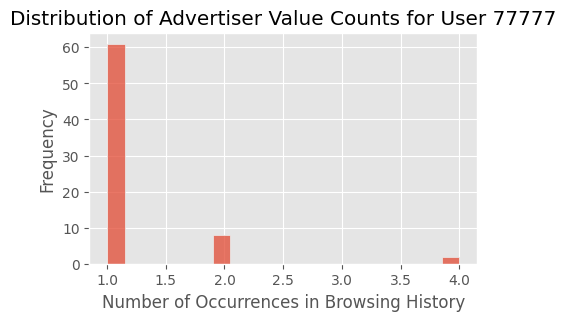

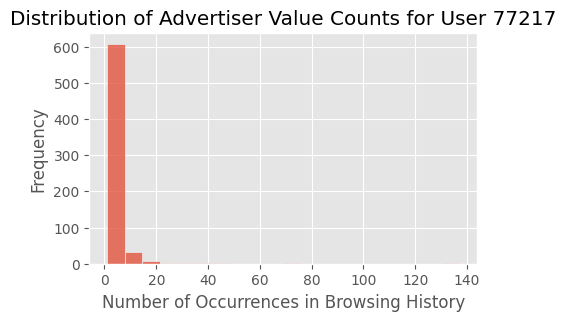

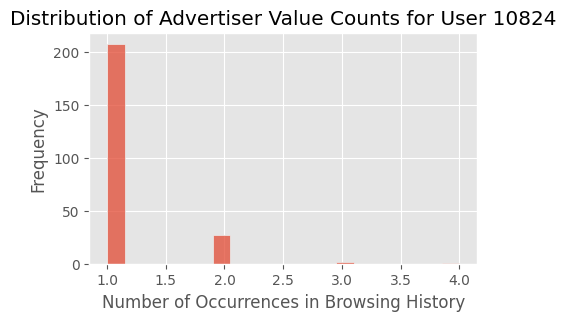

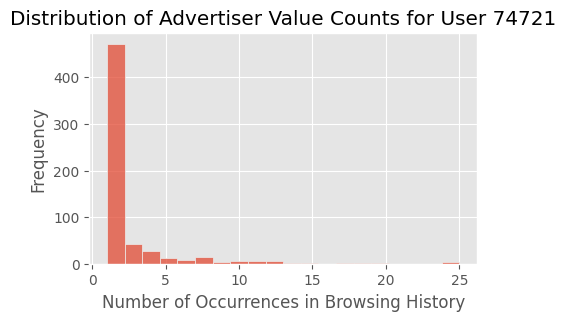

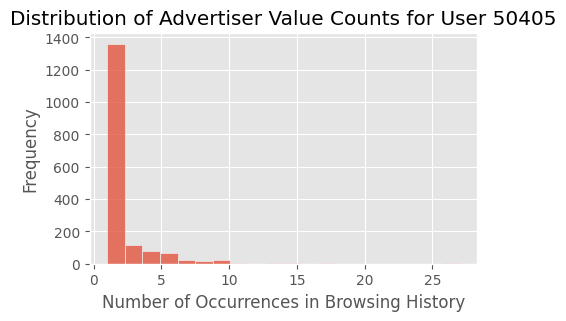

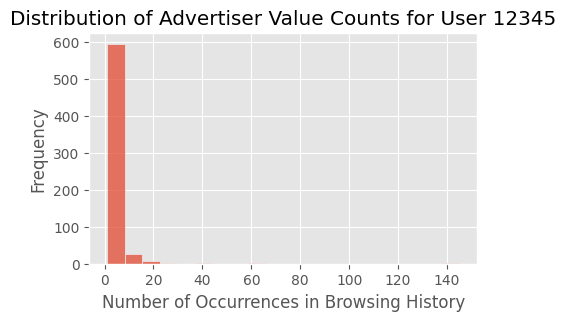

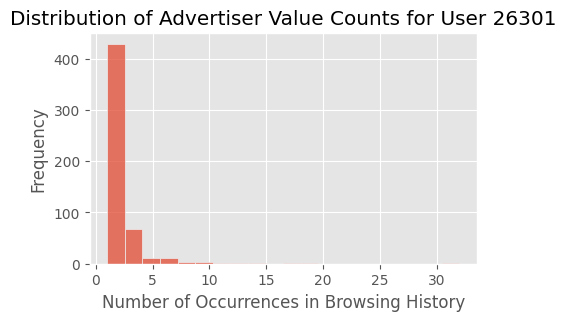

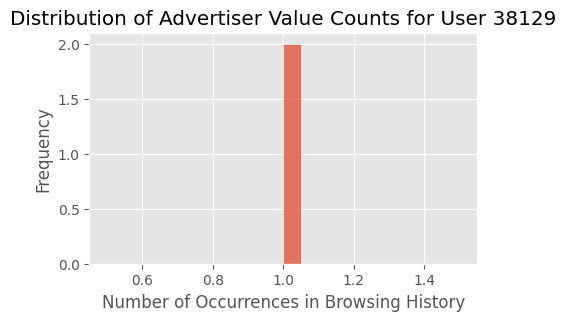

In [46]:
def plot_value_counts(code,df):
    val_counts = df['author_name'].value_counts()
    plt.style.use('ggplot')
    plt.figure(figsize=(5,3))
    sns.histplot(val_counts,bins=20)
    plt.title(f'Distribution of Advertiser Value Counts for User {code}')
    plt.xlabel('Number of Occurrences in Browsing History')
    plt.ylabel('Frequency')
    plt.show()

for i in range(8):
    plot_value_counts(codes[i],ads[i])

In [48]:
def plot_top_n_avertiser_frequency(n,code,df):
    # Get the top n most frequent advertisers
    val_counts = df['author_name'].value_counts().head(n)
    
    # Plot the frequency of the top n advertisers
    plt.style.use('ggplot')
    plt.figure(figsize=(10,6))
    sns.barplot(x=val_counts.index, y=val_counts.values)
    plt.title(f'Frequency of Advertiser Accounts for User {code}')
    plt.xlabel('Advertiser Account')
    plt.ylabel('Frequency')
    plt.xticks(rotation=75)
    plt.show()

/Users/edithpo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129419 (\N{BUTTERFLY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127872 (\N{RIBBON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


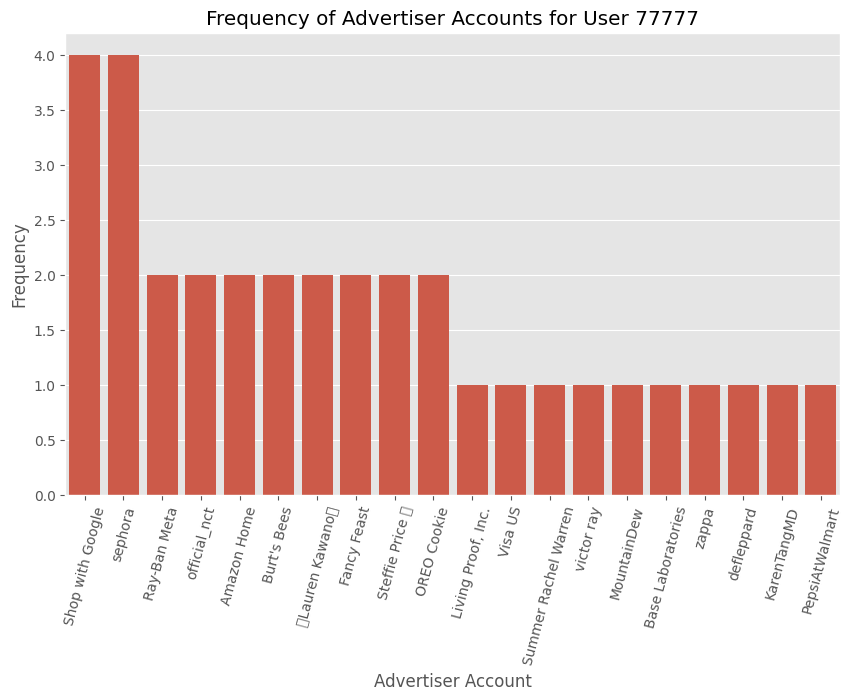

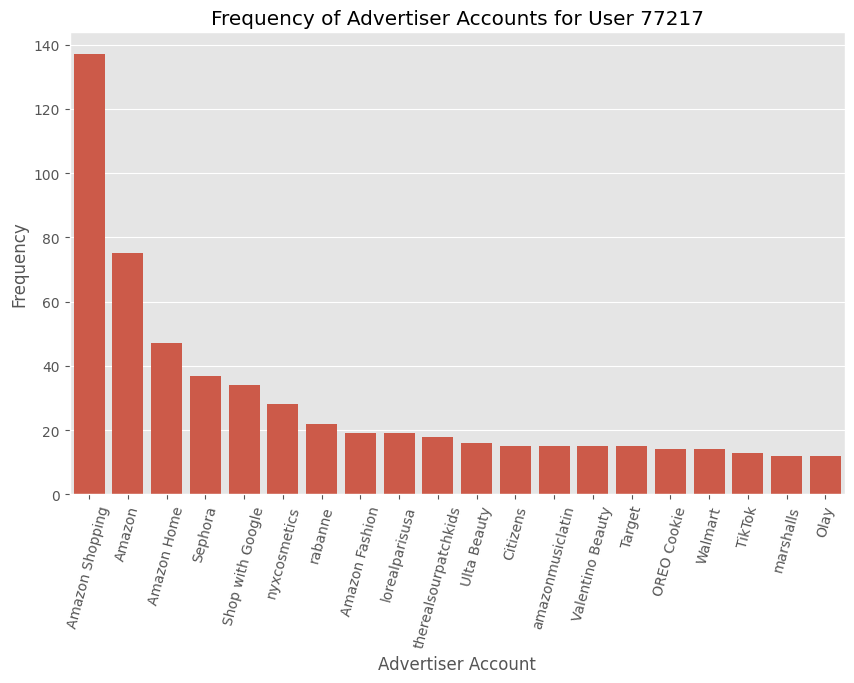

/Users/edithpo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128133 (\N{NAIL POLISH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/edithpo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127997 (\N{EMOJI MODIFIER FITZPATRICK TYPE-4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


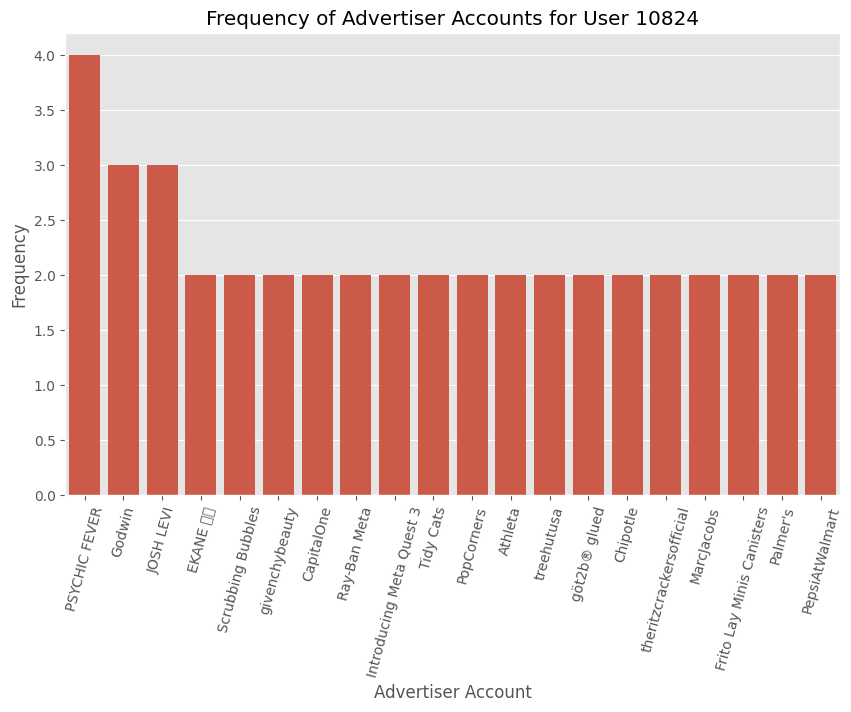

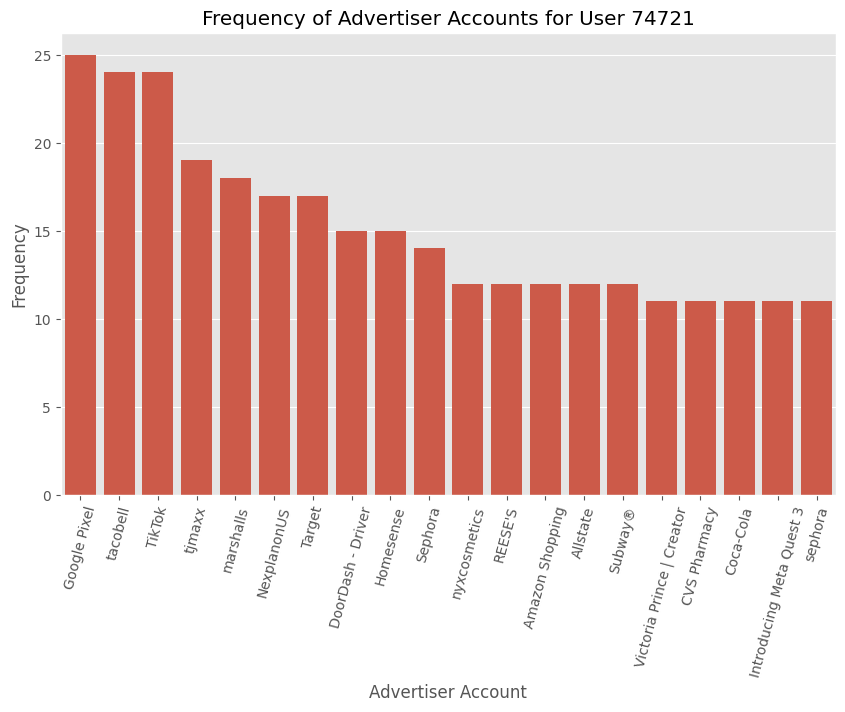

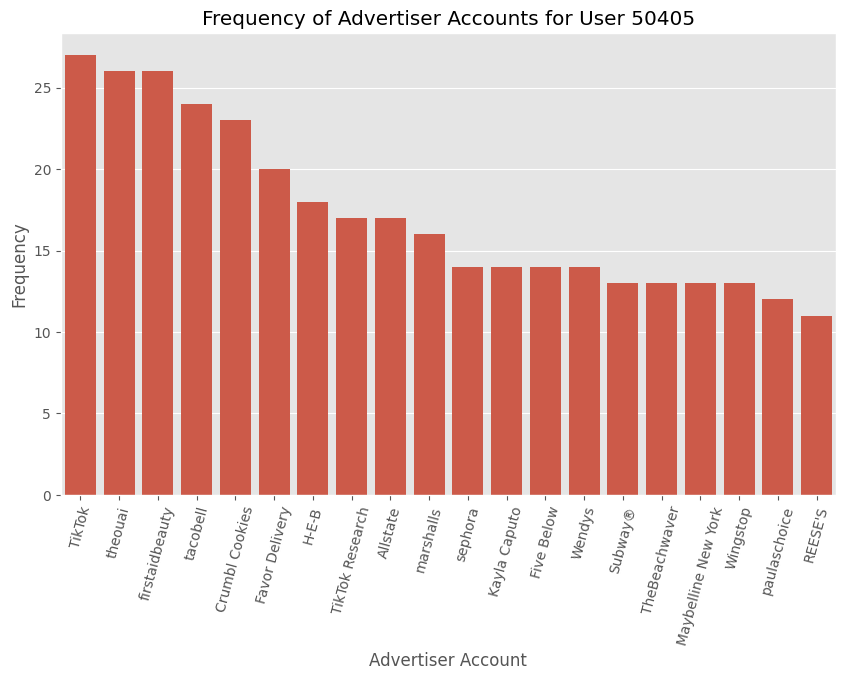

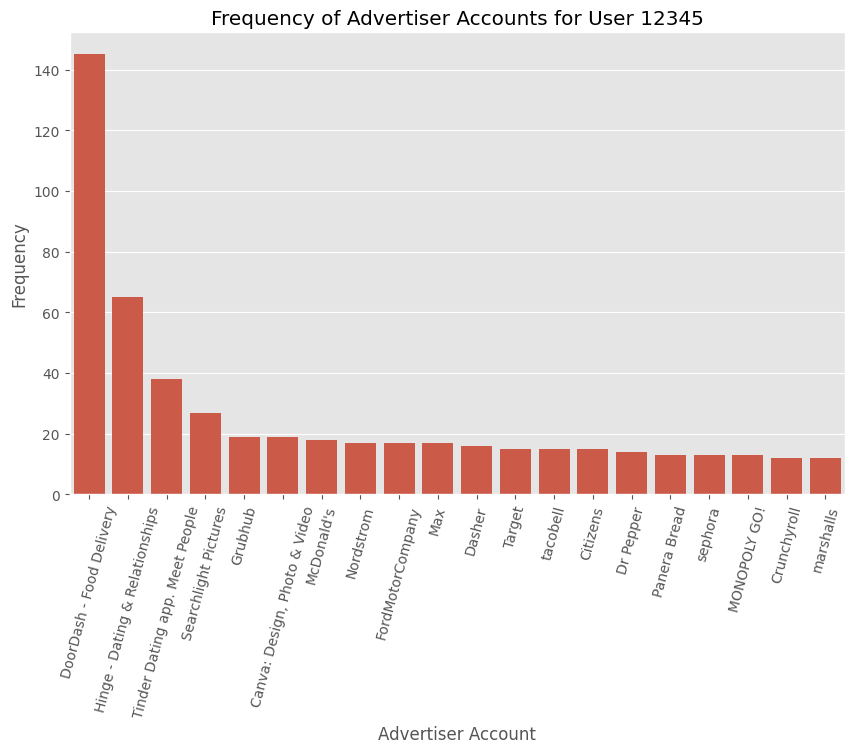

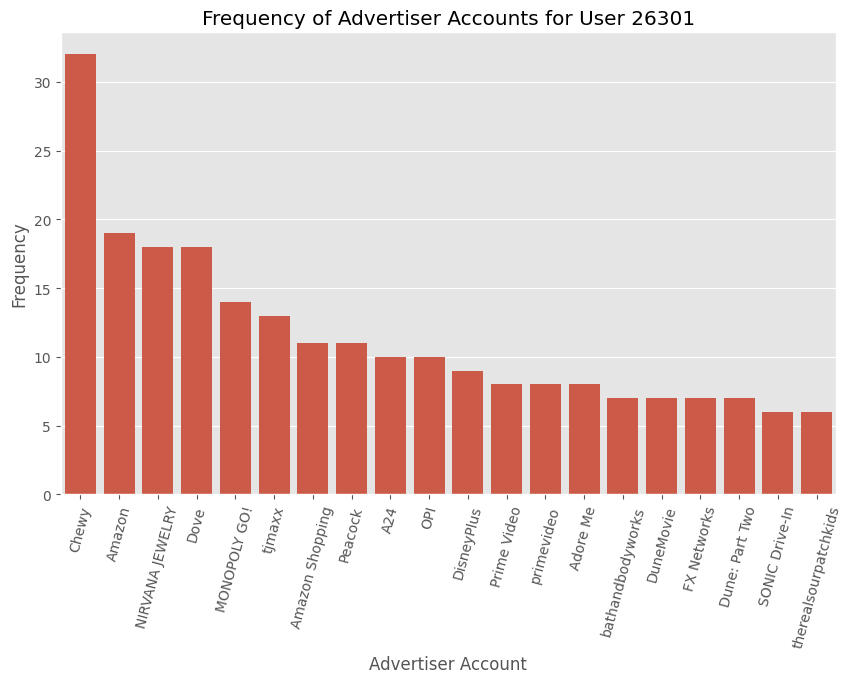

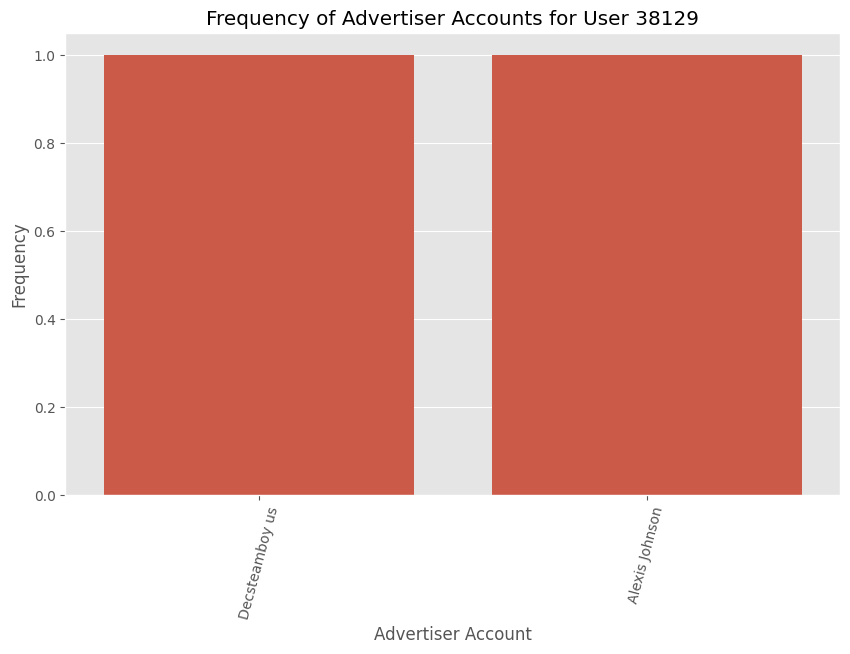

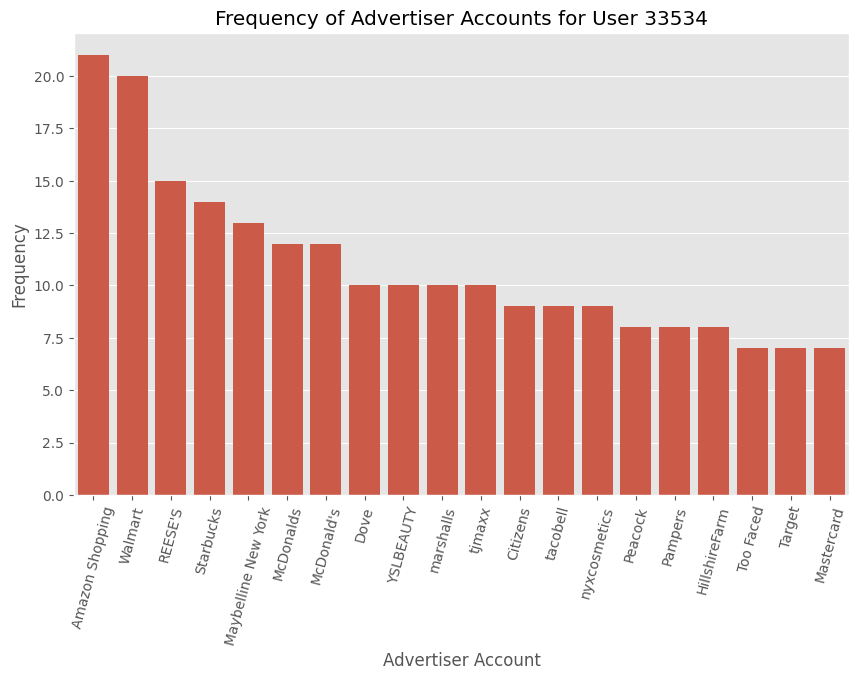

In [49]:
for i in range(9):
#     plot_author_frequency(codes[i],ads[i])
    plot_top_n_avertiser_frequency(20,codes[i],ads[i])

### Check for overlap in the advertisers for our users

In [50]:
# Dictionary for each advertiser and user
advertiser_and_user = {}

# Add the advertisers to dict along with the 
for code, df in zip(codes, ads):
    advertiser_counter = Counter(df['author_name'])
    for key, value in advertiser_counter.items():
        if key in advertiser_and_user:
            advertiser_and_user[key].append((code, value))  # Append both code and count
        else:
            advertiser_and_user[key] = [(code, value)]  # Create a new list

print(advertiser_and_user)

{'Rockstar Energy': [('77777', 1), ('77217', 5), ('74721', 2), ('50405', 4), ('12345', 1), ('26301', 2)], 'The Ritz-Carlton': [('77777', 1)], "Burt's Bees": [('77777', 2), ('77217', 2), ('74721', 2), ('50405', 2), ('12345', 2)], 'Clara Peirce': [('77777', 1), ('12345', 1)], 'Fancy Feast': [('77777', 2), ('77217', 2), ('74721', 4), ('50405', 2), ('12345', 5), ('26301', 1)], 'Subway®': [('77777', 1), ('10824', 1), ('74721', 12), ('50405', 13), ('12345', 12)], 'OREO Cookie': [('77777', 2), ('77217', 14), ('10824', 1), ('74721', 4), ('50405', 7), ('12345', 3), ('26301', 1), ('33534', 1)], 'KarenTangMD': [('77777', 1), ('74721', 1), ('12345', 1)], 'MountainDew': [('77777', 1), ('77217', 9), ('10824', 1), ('74721', 3), ('50405', 2), ('12345', 4), ('26301', 2)], 'sephora': [('77777', 4), ('77217', 10), ('10824', 1), ('74721', 11), ('50405', 14), ('12345', 13), ('26301', 1), ('33534', 1)], 'Living Proof, Inc.': [('77777', 1), ('77217', 1)], 'Visa US': [('77777', 1), ('10824', 1), ('74721', 1),

In [51]:
num_overlap_advertisers = 0
for advertiser, user_list in advertiser_and_user.items():
    if len(user_list) > 2:
        num_overlap_advertisers += 1
        print(advertiser)
        print(user_list)
        print()
print(num_overlap_advertisers)

Rockstar Energy
[('77777', 1), ('77217', 5), ('74721', 2), ('50405', 4), ('12345', 1), ('26301', 2)]

Burt's Bees
[('77777', 2), ('77217', 2), ('74721', 2), ('50405', 2), ('12345', 2)]

Fancy Feast
[('77777', 2), ('77217', 2), ('74721', 4), ('50405', 2), ('12345', 5), ('26301', 1)]

Subway®
[('77777', 1), ('10824', 1), ('74721', 12), ('50405', 13), ('12345', 12)]

OREO Cookie
[('77777', 2), ('77217', 14), ('10824', 1), ('74721', 4), ('50405', 7), ('12345', 3), ('26301', 1), ('33534', 1)]

KarenTangMD
[('77777', 1), ('74721', 1), ('12345', 1)]

MountainDew
[('77777', 1), ('77217', 9), ('10824', 1), ('74721', 3), ('50405', 2), ('12345', 4), ('26301', 2)]

sephora
[('77777', 4), ('77217', 10), ('10824', 1), ('74721', 11), ('50405', 14), ('12345', 13), ('26301', 1), ('33534', 1)]

Visa US
[('77777', 1), ('10824', 1), ('74721', 1), ('12345', 1), ('26301', 2), ('33534', 2)]

PepsiAtWalmart
[('77777', 1), ('10824', 2), ('50405', 1)]

SalonCentric
[('77777', 1), ('10824', 1), ('12345', 1)]

Do

In [ ]:
# Look at the time range for each user, monthly
# maybe make a couple of groups for each holiday